In [807]:
#BostonAirbnb

In [808]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [809]:
#read and explore the data
boston = pd.read_csv('Boston_listings.csv')
boston.shape

(3585, 95)

In [810]:
boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [811]:
boston.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

Remove unnecessary columns These columns are uniform:
  * requires_license all f
  * experiences_offered all 'none'
  * has_availability all t


We also remove the following:
  * host_listing_count, host_total_listings_count seem problematic (outliers); we keep calculated_host_listings_count
  * city, state, street, longitude, latitude all similar for this--Seattle--data base
  * url columns have no explanatory power

In [812]:
#Remove unnecessary columns

df = boston.drop(['id','scrape_id', 'listing_url', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url',
        'host_location','host_neighbourhood', 'host_about', 'host_verifications', 'host_response_time',
        'host_listings_count', 'host_total_listings_count', 'host_response_rate', 'host_acceptance_rate',
        'bed_type', 'amenities','street' , 'city', 'state', 'zipcode', 'market', 'smart_location', 'transit',
        'country_code', 'country', 'latitude', 'longitude','street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed','calendar_last_scraped', 'calendar_updated',
        'jurisdiction_names', 'requires_license', 'license', 'experiences_offered',
        'last_scraped', 'has_availability' ], axis=1)

In [813]:
#also drop the availability 30, 60, 90, 365
df = df.drop(['availability_30', 'availability_60', 'availability_90', 'availability_365'], axis = 1)
#also drop detailed reviews.  Keep only overall 'review_scores_rating',
df = df.drop(['review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'], axis=1)

In [814]:
print(df.shape)
df.head()

(3585, 40)


,name,summary,space,description,neighborhood_overview,notes,access,interaction,house_rules,host_since,...,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,2015-04-15,...,0,NaN,NaN,NaN,f,moderate,f,f,1,NaN
1,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,2012-06-07,...,36,2014-06-01,2016-08-13,94.0,t,moderate,f,f,1,1.30
2,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...",2009-05-11,...,41,2009-07-19,2016-08-05,98.0,f,moderate,t,f,1,0.47
3,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,The basement has a washer dryer and gym area. ...,We do live in the house therefore might be som...,- The bathroom and house are shared so please ...,2013-04-21,...,1,2016-08-28,2016-08-28,100.0,f,moderate,f,f,1,1.00
4,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...","I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,You will have access to the front and side por...,I love my city and really enjoy sharing it wit...,"Please no smoking in the house, porch or on th...",2014-05-11,...,29,2015-08-18,2016-09-01,99.0,f,flexible,f,f,1,2.25


In [815]:
df.describe()

,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
count,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,3585.000000,2772.000000,3585.000000,2829.000000
mean,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,19.044630,91.916667,12.733891,1.970908
std,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,35.571658,9.531686,29.415076,2.120561
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,20.000000,1.000000,0.010000
25%,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,1.000000,89.000000,1.000000,0.480000
50%,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,5.000000,94.000000,2.000000,1.170000
75%,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,21.000000,98.250000,6.000000,2.720000
max,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,404.000000,100.000000,136.000000,19.150000


In [816]:
# numeric columns
df.select_dtypes(include=['int', 'float'])

,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
0,4,1.5,2.0,3.0,NaN,1,2,1125,0,NaN,1,NaN
1,2,1.0,1.0,1.0,NaN,0,2,15,36,94.0,1,1.30
2,2,1.0,1.0,1.0,NaN,1,3,45,41,98.0,1,0.47
3,4,1.0,1.0,2.0,NaN,2,1,1125,1,100.0,1,1.00
4,2,1.5,1.0,2.0,NaN,1,2,31,29,99.0,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...
3580,3,1.0,1.0,1.0,NaN,1,2,1125,4,90.0,8,0.34
3581,2,1.0,1.0,1.0,NaN,1,3,365,0,NaN,2,NaN
3582,4,1.0,1.0,1.0,NaN,1,3,12,0,NaN,1,NaN
3583,2,1.0,1.0,1.0,NaN,1,1,13,2,90.0,1,2.00


In [817]:
#categorical columns
df.select_dtypes(include=['object'])
#note that this data base has two descriptive columns 'access' and 'intearction' not available in Seattle data

,name,summary,space,description,neighborhood_overview,notes,access,interaction,house_rules,host_since,...,monthly_price,security_deposit,cleaning_fee,extra_people,first_review,last_review,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,2015-04-15,...,NaN,NaN,$35.00,$0.00,NaN,NaN,f,moderate,f,f
1,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,2012-06-07,...,NaN,$95.00,$10.00,$0.00,2014-06-01,2016-08-13,t,moderate,f,f
2,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...",2009-05-11,...,"$1,350.00",NaN,NaN,$20.00,2009-07-19,2016-08-05,f,moderate,t,f
3,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,The basement has a washer dryer and gym area. ...,We do live in the house therefore might be som...,- The bathroom and house are shared so please ...,2013-04-21,...,NaN,$100.00,$50.00,$25.00,2016-08-28,2016-08-28,f,moderate,f,f
4,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...","I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,You will have access to the front and side por...,I love my city and really enjoy sharing it wit...,"Please no smoking in the house, porch or on th...",2014-05-11,...,NaN,NaN,$15.00,$0.00,2015-08-18,2016-09-01,f,flexible,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,NaN,NaN,NaN,NaN,1. No damage to the house or furniture 2. No S...,2014-07-31,...,NaN,$95.00,NaN,$24.00,2015-09-18,2016-08-27,t,strict,f,f
3581,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",NaN,NaN,NaN,NaN,NaN,2015-07-02,...,NaN,$100.00,$15.00,$0.00,NaN,NaN,f,strict,f,f
3582,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,"Cambridge is a short walk into Boston, and set...","Depending on when you arrive, I can be here to...",The whole place including social areas is your...,NaN,NaN,2014-01-14,...,NaN,NaN,NaN,$0.00,NaN,NaN,f,flexible,f,f
3583,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",NaN,NaN,NaN,NaN,NaN,2016-05-27,...,NaN,$100.00,NaN,$30.00,2016-08-27,2016-09-04,f,st

In [818]:
#to find out the popular words, parse text in name column
def parse_text(df, col):
    '''
    INPUT:
    df - dataframe
    col - column to be parsed
    OUTPUT:
    a pandas series of words ranked by frequency
    '''
    text = df[col]
    all_t = ''
    for t in text:
        try:
            all_t = all_t + ' ' + t.lower()
        except:
            continue
    return pd.Series(all_t.split(' ')).value_counts()
word_rank = parse_text(df, 'name')    

In [819]:
print(word_rank[0:50])

in           916
boston       583
room         546
private      337
bedroom      313
end          305
the          285
apartment    279
to           265
near         256
south        236
1            235
cozy         234
back         224
studio       224
2            212
bay          206
apt          196
2br          185
of           176
-            172
1br          167
hill         161
beacon       160
spacious     159
and          157
&            152
with         151
fenway       141
lux          141
beautiful    139
by           136
condo        129
luxury       129
downtown     128
             127
sunny        123
heart        118
home         117
a            101
modern       100
bed           99
great         99
location      98
north         98
br            95
on            94
close         91
charming      87
t             87
dtype: int64


Note: The same analysis for the 'summary' column did not show any new word.


Now we will clean up the list returned in the first pass, first removing generic terms and grammatical forms (prepositions, conjunctions, etc. ), then local references.

In [820]:
#clean up the list returned in first pass
 
word_rank_ = word_rank.drop(labels=['in', 'the','to', '-', '&', 'with', 'w/', 'and', 'of', 'on', 'a', 'for','at',
                                    'from', 'by', '1', '2', '3', 'one', 'back', 'end', 't', 'jp',
                                    'bedroom', 'room', '2br', '1br', 'br', 'bed', 'bath','condo','city', 'location',
                                    'house','home', 'apartment', 'apt','apt.','studio', 'room', 'floor', 
                                   'street', 'area'], axis=0)
print(word_rank_[0:30])

boston        583
private       337
near          256
south         236
cozy          234
bay           206
hill          161
beacon        160
spacious      159
fenway        141
lux           141
beautiful     139
luxury        129
downtown      128
              127
sunny         123
heart         118
modern        100
great          99
north          98
close          91
charming       87
new            76
brownstone     74
furnished      74
large          69
harvard        68
historic       61
loft           58
quiet          57
dtype: int64


In [821]:
#Remove local references
word_rank_ = word_rank_.drop(labels=['boston', 'hill','beacon', 'fenway', 'harvard','allston','north', 'south'], axis=0 )
print(word_rank_[0:30])

private       337
near          256
cozy          234
bay           206
spacious      159
lux           141
beautiful     139
luxury        129
downtown      128
              127
sunny         123
heart         118
modern        100
great          99
close          91
charming       87
new            76
brownstone     74
furnished      74
large          69
historic       61
loft           58
quiet          57
victorian      55
suite          55
best           50
maverick,      46
walk           45
convenient     45
penthouse      44
dtype: int64


In [822]:
#this is the list of 25 most popular terms
buzz = ['private', 'near', 'cozy', 'bay', 'spacious', 'beautiful', 'luxury',
                  'downtown', 'sunny', 'heart', 'modern', 'great', 'close', 'charming', 'new',  
        'brownstone', 'furnished',
        'large', 'historic', 'loft', 'quiet', 'victorian', 'suite', 'best', 'maverick']
print(len(buzz))

25


We can now use the 'buzz' list to calculate the number of occurences of one of the buzzwords (item in the list) in each row of the the name and summary columns.  The sum of these two numbers if the buzz count for the record.

In [823]:
#Calculate the buzz value of name in each row

def buzzword_count(df, col):
    '''
    INPUT:
    df - dataframe
    col - column of interest
    OUTPUT
    list of integers equal to the number of occurences of a buzz item(aka buzzword) in 'col' in each row
    '''
    buzz_col = []
    for item in df[col]:
        try:
            title = pd.Series(item.lower().split(' '))
            buzz_count = title[title.isin(buzz)==True].value_counts().sum()
        except:
            buzz_count = 0
        buzz_col.append(buzz_count)
    return buzz_col
buzz_name = buzzword_count(df, 'name')

In [824]:
#repeat the calculation for the summary column
buzz_summary = buzzword_count(df, 'summary')
print(buzz_summary[0:10])
print(len(buzz_summary))

[1, 3, 2, 2, 2, 2, 2, 2, 2, 2]
3585


In [825]:
#combine the buzzcounts of the name and summary columns
buzz_col = np.array(buzz_name) + np.array(buzz_summary)
print(buzz_col[0:10])
print(len(buzz_col))

[2 4 2 6 2 4 3 2 3 2]
3585


In [826]:
#insert a buzz count column in data frame
df.insert(3, column='buzz_count',value=buzz_col)

In [827]:
df.head()

,name,summary,space,buzz_count,description,neighborhood_overview,notes,access,interaction,house_rules,...,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,2,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,...,0,NaN,NaN,NaN,f,moderate,f,f,1,NaN
1,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,4,Charming and quiet room in a second floor 1910...,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,...,36,2014-06-01,2016-08-13,94.0,t,moderate,f,f,1,1.30
2,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",2,"Come stay with a friendly, middle-aged guy in ...",The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...",...,41,2009-07-19,2016-08-05,98.0,f,moderate,t,f,1,0.47
3,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,6,Come experience the comforts of home away from...,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,The basement has a washer dryer and gym area. ...,We do live in the house therefore might be som...,- The bathroom and house are shared so please ...,...,1,2016-08-28,2016-08-28,100.0,f,moderate,f,f,1,1.00
4,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...",2,"My comfy, clean and relaxing home is one block...","I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,You will have access to the front and side por...,I love my city and really enjoy sharing it wit...,"Please no smoking in the house, porch or on th...",...,29,2015-08-18,2016-09-01,99.0,f,flexible,f,f,1,2.25


In [828]:
#Remove text columns: name, summary, space, description, neignborhood_overview, notes, etc.
df_select = df.drop(['name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 
                     'access', 'interaction', 'house_rules'], axis=1)
print(df_select.shape)
df_select.head()

(3585, 32)


,buzz_count,host_since,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,...,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2,2015-04-15,f,t,f,t,House,Entire home/apt,4,1.5,...,0,NaN,NaN,NaN,f,moderate,f,f,1,NaN
1,4,2012-06-07,f,t,t,t,Apartment,Private room,2,1.0,...,36,2014-06-01,2016-08-13,94.0,t,moderate,f,f,1,1.30
2,2,2009-05-11,t,t,t,t,Apartment,Private room,2,1.0,...,41,2009-07-19,2016-08-05,98.0,f,moderate,t,f,1,0.47
3,6,2013-04-21,f,t,f,f,House,Private room,4,1.0,...,1,2016-08-28,2016-08-28,100.0,f,moderate,f,f,1,1.00
4,2,2014-05-11,t,t,t,t,House,Private room,2,1.5,...,29,2015-08-18,2016-09-01,99.0,f,flexible,f,f,1,2.25


Next, we clean up the remaining categorical columns.

The binary columns are coded t/f in the database.  We dummy those columns with 1/0 drop the first colum, and drop the original column from df_select.


In [829]:
#dummy true/false columns --t/f in the data base.  Replace with 1/0.  Drop one column.
t_f = ['instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification',
       'host_identity_verified', 'host_has_profile_pic', 'host_is_superhost', 'is_location_exact']
for item in t_f:
    df_cats = pd.get_dummies(df_select[item], prefix=item, drop_first=True)
    df_select = pd.concat([df_select, df_cats], axis=1)
    #drop the original column
    df_select = df_select.drop(item, axis=1)
df_select.shape

(3585, 32)

We also dummy the non-binary categorical columns and drop the original, this time retaining the first column (drop_first = False).  We drop the original column from df_select.

Note:  After some experimentations, we decided to drop the property_type column because of the extensive number of categories.  The remaining 'room_type' column seems to be an adequate grouping of the type of properties.

In [830]:
#dummy non-binary cateegorical columns
def dummy_cat_var(df, col, prefix, drop_first):
    '''
    INPUT:
    df - dataframe
    col - name of column to be dummied
    prefix - new (added) column name
    drop_first - whether to drop the first of the engineered columns (True/False)
    OUTPUT:
    a revised dataframe with new columns added, replacing the original categorical column
    '''
    df = pd.concat([df, pd.get_dummies(df[col], 
                 prefix=prefix, drop_first=drop_first)], axis=1)
    df = df.drop(col, axis=1)
    return df
df_select = dummy_cat_var(df_select, 'cancellation_policy', 'cancellation', False)

df_select = df_select.drop(['property_type'], axis=1)

df_select = dummy_cat_var(df_select, 'room_type', 'room_type', False)
df_select.shape

(3585, 36)

In [831]:
df_select.columns

Index(['buzz_count', 'host_since', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'number_of_reviews', 'first_review',
       'last_review', 'review_scores_rating', 'calculated_host_listings_count',
       'reviews_per_month', 'instant_bookable_t',
       'require_guest_profile_picture_t', 'require_guest_phone_verification_t',
       'host_identity_verified_t', 'host_has_profile_pic_t',
       'host_is_superhost_t', 'is_location_exact_t', 'cancellation_flexible',
       'cancellation_moderate', 'cancellation_strict',
       'cancellation_super_strict_30', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [832]:
df_select.select_dtypes(include=['int', 'float'])
#df_select.select_dtypes(include=['object'])

,buzz_count,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
0,2,4,1.5,2.0,3.0,NaN,1,2,1125,0,NaN,1,NaN
1,4,2,1.0,1.0,1.0,NaN,0,2,15,36,94.0,1,1.30
2,2,2,1.0,1.0,1.0,NaN,1,3,45,41,98.0,1,0.47
3,6,4,1.0,1.0,2.0,NaN,2,1,1125,1,100.0,1,1.00
4,2,2,1.5,1.0,2.0,NaN,1,2,31,29,99.0,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,4,3,1.0,1.0,1.0,NaN,1,2,1125,4,90.0,8,0.34
3581,1,2,1.0,1.0,1.0,NaN,1,3,365,0,NaN,2,NaN
3582,1,4,1.0,1.0,1.0,NaN,1,3,12,0,NaN,1,NaN
3583,2,2,1.0,1.0,1.0,NaN,1,1,13,2,90.0,1,2.00


In [833]:
#look for missing values in the current dataframe
def check_null_in_cols(df):
    n_features = df.shape[1]
    n_records = df.shape[0]
    print('Feature               Missing data   Percent')
    for n in range(0, n_features):
        na = df_select.iloc[:,n].isnull().sum()
        if na !=0:
            print('{:25s}  {:8d}    {:.1f}'.format(df_select.columns[n], na, na/n_records*100))
    return
check_null_in_cols(df_select)            

Feature               Missing data   Percent
bathrooms                        14    0.4
bedrooms                         10    0.3
beds                              9    0.3
square_feet                    3529    98.4
weekly_price                   2693    75.1
monthly_price                  2697    75.2
security_deposit               2243    62.6
cleaning_fee                   1107    30.9
first_review                    756    21.1
last_review                     756    21.1
review_scores_rating            813    22.7
reviews_per_month               756    21.1


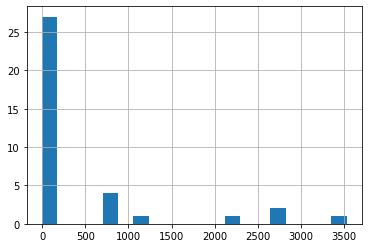

In [834]:
na_pattern = df_select.isnull().sum().hist(bins=20)
plt.show()

There are five columns with more than 20% missing values, but they need individual consideration.

  * square_feet is almost all blank--people either have no idea of the measurements, or don't think it matters (this information is not provided when we rent a hotel room).  We can remove this column. 
  * weekly_price and monthly_price can be inferred approximately, if necessary, based on the daily price.  Those values are correlated and we can remove these columns.
  * security_deposit and cleaning fee, in contrast, are most likely left blank because they are 0:  no such deposit or fee.  So we will retain these columns and replace the missing data with 0.

In [835]:
#drop the square footage, and weekly and monthly price columns
df_select = df_select.drop([ 'square_feet', 'weekly_price', 'monthly_price'], axis=1)
df_select.shape

(3585, 33)

In [836]:
#Replace NaN with 0 in security_deposit and cleaning_fee
df_select['security_deposit'].replace(to_replace=np.NaN, value=0, inplace=True)
df_select['cleaning_fee'].replace(to_replace=np.NaN, value=0, inplace=True)

In [837]:
# also drop 'review'rows with null values
df_select = df_select.dropna(subset=['review_scores_rating'], axis=0)
df_select.shape

(2772, 33)

In [838]:
#check again missing values in columns
check_null_in_cols(df_select)

Feature               Missing data   Percent
bathrooms                        12    0.4
bedrooms                          7    0.3
beds                              6    0.2


In [839]:
#replace missing data with 0 in bathrooms and bedrooms
df_select['bathrooms'].replace(to_replace=np.NaN, value=0, inplace=True)
df_select['bedrooms'].replace(to_replace=np.NaN, value=0, inplace=True)
df_select['beds'].replace(to_replace=np.NaN, value=1, inplace=True)

In [840]:
df_select['first_review'].isnull().sum()
df_select.shape

(2772, 33)

Next we need to deal with the dates in three columns.  Intuitively, we would think that the length of time a host has been renting is more important than the absolute date.  So, we will engineer a new column called 'host years' equal to the number of years between the last review and the first review.  Note, as a first approximation, we did not worry about a more precise estimate, taking into account the number of months between the last and first dates.

We insert this new column in the data frame and remove the date columns.

In [841]:
#Combine first and last review dates as a proxy for "experience"
def convert_dates(df, col):
    '''
    INPUT:
    df - a dataframe
    col - a column with dates
    OUTPUT:
    the year of the event as an integer
    '''
    date_ = df[col].str.split('-')
    year = []
    n_records = df[col].shape[0]
    for i in range (0, n_records):
        year.append(date_.iloc[i][0])
    year_ = pd.Series(year)
    return pd.to_numeric(year_)
year_review_first = convert_dates(df_select, 'first_review')    
year_review_last = convert_dates(df_select, 'last_review')
host_years = np.array(year_review_last) - np.array(year_review_first)

In [842]:
#insert a new column in data frame
df_select.insert(2, column='host_years',value=host_years)
#Then remove date columns
df_select = df_select.drop(['host_since', 'first_review', 'last_review'], axis=1)

We also tried to quantify how successful the host is by combining the cumulative number of listings and the host's experience (host years).  This is still experimental and does not seem to do much.  More on this idea later.

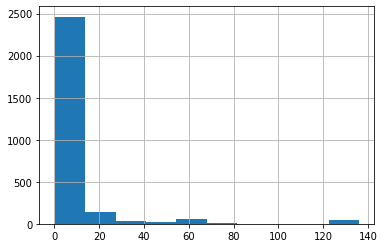

In [843]:
#engineer a new column = 'calculated_host_listings_count'/'host_years'
hosting_avg = df_select['calculated_host_listings_count']/(df_select['host_years']+1)
hosting_avg.hist();

In [844]:
#insert this new column
df_select.insert(2, column='host_momentum',value=hosting_avg)
df_select.drop(['calculated_host_listings_count'], axis=1, inplace=True)

In [845]:
df_select.head()

,buzz_count,host_years,host_momentum,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,...,host_has_profile_pic_t,host_is_superhost_t,is_location_exact_t,cancellation_flexible,cancellation_moderate,cancellation_strict,cancellation_super_strict_30,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
1,4,2,0.333333,2,1.0,1.0,1.0,$65.00,$95.00,$10.00,...,1,0,1,0,1,0,0,0,1,0
2,2,7,0.125000,2,1.0,1.0,1.0,$65.00,0,0,...,1,1,1,0,1,0,0,0,1,0
3,6,0,1.000000,4,1.0,1.0,2.0,$75.00,$100.00,$50.00,...,1,0,0,0,1,0,0,0,1,0
4,2,1,0.500000,2,1.5,1.0,2.0,$79.00,0,$15.00,...,1,1,1,1,0,0,0,0,1,0
5,4,0,1.000000,2,1.0,1.0,1.0,$75.00,0,$30.00,...,1,1,1,1,0,0,0,0,1,0


Finally, we need to convert the currencies (strings) as float, first removing the thousand ',' indicator, and removing the dollar sign if any.

In [846]:
#Convert string $prices to integers
def convert_money(df, col):
    '''
    INPUT:
    df - a dataframe
    col - a column with currency as strings
    OUTPUT:
    a column filled with numeric values
    '''
    s = df[col].replace(regex=r',', value='') #remove the thousand ,
    s = s.str.strip('$')
    s = s.replace(to_replace=np.NaN, value=0)
    return pd.to_numeric(s)
df_select['price'] = convert_money(df_select, 'price')
df_select['security_deposit'] = convert_money(df_select, 'security_deposit')
df_select['cleaning_fee'] = convert_money(df_select, 'cleaning_fee')
df_select['extra_people'] = convert_money(df_select, 'extra_people')

In [847]:
df_select.head()

,buzz_count,host_years,host_momentum,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,...,host_has_profile_pic_t,host_is_superhost_t,is_location_exact_t,cancellation_flexible,cancellation_moderate,cancellation_strict,cancellation_super_strict_30,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
1,4,2,0.333333,2,1.0,1.0,1.0,65.0,95.0,10.0,...,1,0,1,0,1,0,0,0,1,0
2,2,7,0.125000,2,1.0,1.0,1.0,65.0,0.0,0.0,...,1,1,1,0,1,0,0,0,1,0
3,6,0,1.000000,4,1.0,1.0,2.0,75.0,100.0,50.0,...,1,0,0,0,1,0,0,0,1,0
4,2,1,0.500000,2,1.5,1.0,2.0,79.0,0.0,15.0,...,1,1,1,1,0,0,0,0,1,0
5,4,0,1.000000,2,1.0,1.0,1.0,75.0,0.0,30.0,...,1,1,1,1,0,0,0,0,1,0


This concludes the data preparation of the CRISP-DM process.  

In the following, we develop a linear model, with price as the dependent variable.

In [848]:
#A look at the 31 columns in the model
df_select.columns

Index(['buzz_count', 'host_years', 'host_momentum', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'reviews_per_month', 'instant_bookable_t',
       'require_guest_profile_picture_t', 'require_guest_phone_verification_t',
       'host_identity_verified_t', 'host_has_profile_pic_t',
       'host_is_superhost_t', 'is_location_exact_t', 'cancellation_flexible',
       'cancellation_moderate', 'cancellation_strict',
       'cancellation_super_strict_30', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [849]:
#one more check for null values
check_null_in_cols(df_select)

Feature               Missing data   Percent


In [850]:
y = df_select['price']
X = df_select.drop(['price'], axis=1)

# define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [851]:
#instantiate a linear model
lm_model = LinearRegression(normalize=True)

#fit the model to the training set
lm_model.fit(X_train, y_train)

#predict with training and testing sets, successively
y_preds_train = lm_model.predict(X_train)
y_preds_test = lm_model.predict(X_test)

#calculate the r2 scores
r2_train = r2_score(y_train, y_preds_train)
r2_test = r2_score(y_test, y_preds_test)

print("r2 score with training data", r2_train)
print("r2 score with testing data", r2_test)

r2 score with training data 0.5626211380259333
r2 score with testing data 0.5595824478536388


**Observations**


The r2 scores are weak and very similar to the values obtained with the Seattle data. The conclusions are the same.

If this were a project with a serious business objective, we could try to improve the results by using a model that is not linear.  I do not think that adding back some of the features we removed would help, on the contrary. 

Fundamentally, I think 'price' is unsatisfactory as a dependent variable.  I used it for lack of a better alternative.  One can argue that the variables in the model can explain the rental price for the property. On the other hand, the price surely is a factor in a property’s attractiveness and a guest’s decision to rent it or not. 

To quantify this attractiveness, I wish we had the equivalent of 'days on the market' in real estate, i.e., the length of time between the property being listed for sale and a closed deal.  In my opinion, this data— the time between listing and renting (which Airbnb may be tracking privately)—is the best measure of the demand for a property.  It would be interesting to rerun this analysis with this additional information. 

In [852]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    
    NOTE: This function was obtained from the Udacity instructor's lecture notes.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(40)

,est_int,coefs,abs_coefs
26,cancellation_super_strict_30,7.227166e+13,7.227166e+13
24,cancellation_moderate,7.227166e+13,7.227166e+13
25,cancellation_strict,7.227166e+13,7.227166e+13
23,cancellation_flexible,7.227166e+13,7.227166e+13
28,room_type_Private room,-1.174717e+13,1.174717e+13
29,room_type_Shared room,-1.174717e+13,1.174717e+13
27,room_type_Entire home/apt,-1.174717e+13,1.174717e+13
18,require_guest_phone_verification_t,5.181032e+01,5.181032e+01
17,require_guest_profile_picture_t,-4.346852e+01,4.346852e+01
4,bathrooms,3.340437e+01,3.340437e+01


The results are similar to those obtained with the Seattle data.

We see that the two main factors explaining 'price' are cancellation policies and the type of accommodation (private room, entire house, etc.).  (The order of these two groups are reversed in the Seattle results, but this is insignificant.)   Again, the host's profile is relevant.  As for the 'buzz_count' variable, it ranks in the middle.

A summary of this analysis is published on [Medium](https://medium.com/@genevievesegol/what-do-airbnb-and-scientific-american-have-in-common-abdd3ab72dbc)